C:\Users\xyc93\AppData\Local\Temp\ipykernel_127776\3035530699.py:92: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "rx" (-> color='r'). The keyword argument will take precedence.
  plt.plot(equilibrium[0], equilibrium[1], 'rx', markersize=15,


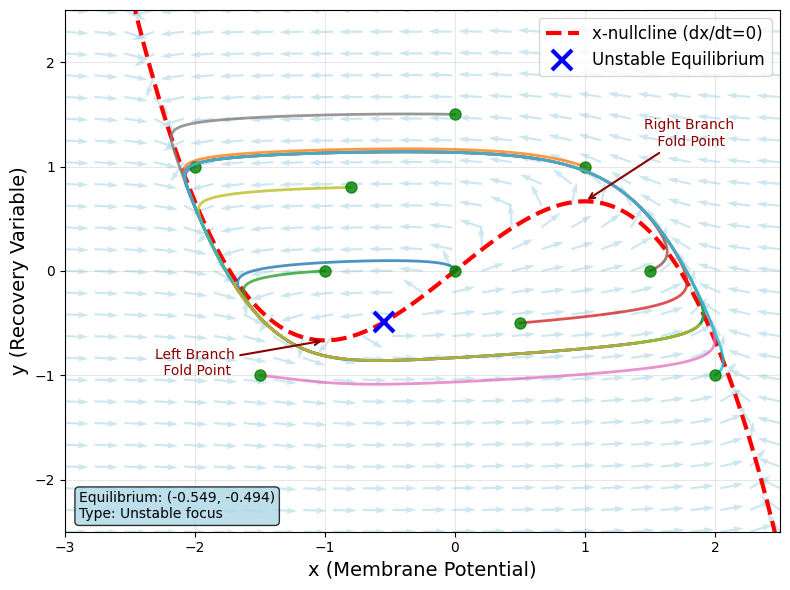

Phase portrait generated successfully!
Equilibrium point: [-0.549, -0.494]
System shows unstable focus with stable limit cycle


In [48]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import matplotlib.colors as mcolors

# FHN system parameters
a1 = 1/3
epsilon = 0.1
b1 = 0.5
b2 = 0.1

# Equilibrium point
# equilibrium = [-0.5, -0.4583]
equilibrium = [-0.549, -0.494]

def fhn_system(t, state):
    """
    FitzHugh-Nagumo system equations.
    dx/dt = x - (1/3)*x^3 - y
    dy/dt = 0.5*(x + 0.5)
    """
    x, y = state
    dxdt = x - a1*x**3 - y
    # dydt = epsilon * (x + b1)
    dydt = epsilon * (x + b1 - b2 * y)
    return [dxdt, dydt]

def generate_trajectory(x0, y0, t_span, dt=0.01):
    """Generate trajectory from initial condition"""
    t_eval = np.arange(t_span[0], t_span[1], dt)
    sol = solve_ivp(fhn_system, t_span, [x0, y0], t_eval=t_eval, 
                    method='RK45', rtol=1e-8, atol=1e-10)
    return sol.y[0], sol.y[1]

def generate_vector_field(x_range, y_range, density=20):
    """Generate vector field for phase portrait"""
    x = np.linspace(x_range[0], x_range[1], density)
    y = np.linspace(y_range[0], y_range[1], density)
    X, Y = np.meshgrid(x, y)
    
    DX = X - a1*X**3 - Y
    DY = epsilon * (X + 0.5)
    
    # Normalize arrows
    M = np.sqrt(DX**2 + DY**2)
    M[M == 0] = 1  # Avoid division by zero
    DX_norm = DX / M
    DY_norm = DY / M
    
    return X, Y, DX_norm, DY_norm

def generate_x_nullcline(x_range):
    """Generate x-nullcline: y = x - x^3/3"""
    x = np.linspace(x_range[0], x_range[1], 1000)
    y = x - a1*x**3
    return x, y

# Create the phase portrait
plt.figure(figsize=(8, 6))

# Set up the plot range
x_range = [-3, 2.5]
y_range = [-2.5, 2.5]

# Generate and plot vector field
X, Y, DX, DY = generate_vector_field(x_range, y_range, density=25)
plt.quiver(X, Y, DX, DY, alpha=0.6, color='lightblue', width=0.003, scale=30)

# Generate x-nullcline
x_null, y_null = generate_x_nullcline(x_range)
plt.plot(x_null, y_null, 'r--', linewidth=3, label='x-nullcline (dx/dt=0)')

# Generate multiple trajectories from different initial conditions
initial_conditions = [
    [0, 0], [1, 1], [-1, 0], [0.5, -0.5], [-2, 1],
    [1.5, 0], [-1.5, -1], [0, 1.5], [-0.8, 0.8], [2, -1]
]

colors = plt.cm.tab10(np.linspace(0, 1, len(initial_conditions)))

for i, (x0, y0) in enumerate(initial_conditions):
    # Generate trajectory
    x_traj, y_traj = generate_trajectory(x0, y0, [0, 20], dt=0.01)
    
    # Plot trajectory
    plt.plot(x_traj, y_traj, color=colors[i], linewidth=2, alpha=0.8)
    
    # Plot initial point
    plt.plot(x0, y0, 'o', color='green', markersize=8, alpha=0.8)

# Plot equilibrium point
plt.plot(equilibrium[0], equilibrium[1], 'rx', markersize=15, 
         markeredgewidth=3, label='Unstable Equilibrium', color='blue')

# Add annotations
# plt.annotate('Equilibrium', 
#              xy=(equilibrium[0], equilibrium[1]), 
#              xytext=(equilibrium[0]+0.5, equilibrium[1]-0.5),
#              arrowprops=dict(arrowstyle='->', color='blue', lw=2),
#              fontsize=12, color='blue', ha='center')

# Annotate nullcline branches
plt.annotate('Left Branch\n Fold Point', 
             xy=(-1, -2/3), xytext=(-2.0, -1.0),
             arrowprops=dict(arrowstyle='->', color='darkred', lw=1.5),
             fontsize=10, color='darkred', ha='center')

plt.annotate('Right Branch\n Fold Point', 
             xy=(1, 2/3), xytext=(1.8, 1.2),
             arrowprops=dict(arrowstyle='->', color='darkred', lw=1.5),
             fontsize=10, color='darkred', ha='center')

# Customize plot
plt.xlim(x_range)
plt.ylim(y_range)
plt.xlabel('x (Membrane Potential)', fontsize=14)
plt.ylabel('y (Recovery Variable)', fontsize=14)
# plt.title('FitzHugh-Nagumo System Phase Portrait', fontsize=20, pad=10)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=12, loc='upper right')

# # Add text box with system equations
# textstr = r'$\frac{dx}{dt} = x - \frac{x^3}{3} - y$' + '\n' + r'$\frac{dy}{dt} = 0.5(x + 0.5)$'
# props = dict(boxstyle='round', facecolor='wheat', alpha=0.8)
# plt.text(0.02, 0.98, textstr, transform=plt.gca().transAxes, fontsize=12,
#          verticalalignment='top', bbox=props)

# Add information about equilibrium
# info_text = 'Equilibrium: (-0.5, -0.458)\nType: Unstable focus'
info_text = 'Equilibrium: (-0.549, -0.494)\nType: Unstable focus'
plt.text(0.02, 0.02, info_text, transform=plt.gca().transAxes, fontsize=10,
         verticalalignment='bottom', bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.8))

plt.tight_layout()
plt.show()

# Optional: Save the figure
# plt.savefig('fhn_phase_portrait.png', dpi=300, bbox_inches='tight')
# plt.savefig('fhn_phase_portrait.pdf', bbox_inches='tight')

print("Phase portrait generated successfully!")
print(f"Equilibrium point: {equilibrium}")
print("System shows unstable focus with stable limit cycle")